### Practicle 8
### Statistical Foundation of Data Sciences
### Divyanshi Bhandari
### GF202344105
### Submitted To- Anitya Sir

In [9]:
# 🌳 Decision Tree Classifier on Pima Indian Diabetes Dataset (Simplified Version)

# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from math import log2

# Step 2: Create dataset 
data = {
    'Pregnancies': [6,1,8,1,0,5,3,10,2,8,7,9,11,1,0,3,6,2,5,4],
    'Glucose': [148,85,183,89,137,116,78,115,197,125,110,180,130,85,95,120,155,140,130,100],
    'BloodPressure': [72,66,64,66,40,74,50,0,70,96,60,80,88,66,75,85,70,90,68,60],
    'SkinThickness': [35,29,0,23,35,0,32,0,45,0,25,30,0,35,32,29,31,25,35,22],
    'Insulin': [0,0,0,94,168,0,88,0,543,0,94,150,105,0,135,80,120,112,130,85],
    'BMI': [33.6,26.6,23.3,28.1,43.1,25.6,31.0,35.3,30.5,0,34.6,32.0,28.4,26.1,30.1,33.2,37.5,40.0,35.2,29.1],
    'Age': [50,31,32,21,33,30,26,29,53,54,35,44,40,28,23,32,41,39,37,27],
    'Outcome': [1,0,1,0,1,0,1,0,1,0,1,1,1,0,0,0,1,1,0,0]
}

df = pd.DataFrame(data)
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1


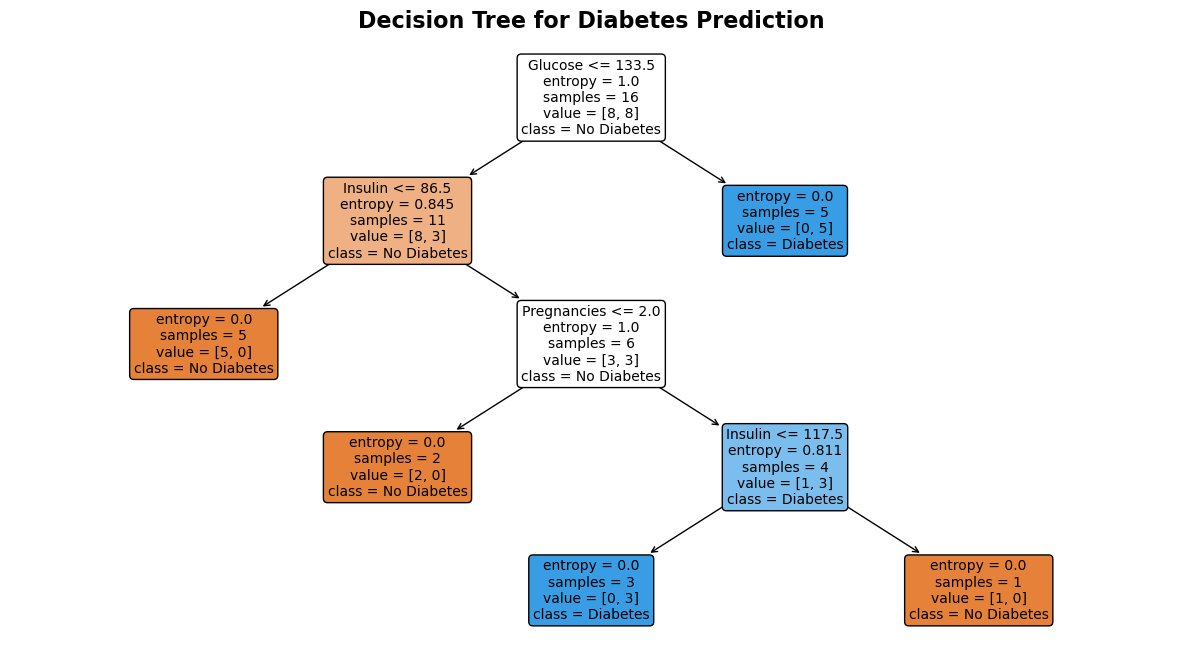

In [15]:
# Step 3: Feature Selection
X = df.drop('Outcome', axis=1)  # independent variables
y = df['Outcome']               # dependent variable

# Step 4: Split data into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Build Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

# Step 6: Visualize the Decision Tree (Fixed)
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plot_tree(
    model,
    feature_names=list(X.columns),    # ✅ FIX: Convert to list
    class_names=['No Diabetes','Diabetes'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Diabetes Prediction", fontsize=16, fontweight='bold')
plt.show()


In [17]:
# Let's calculate Entropy, Gini Index, and Information Gain for the root node manually

def entropy(probabilities):
    return -sum([p*log2(p) for p in probabilities if p != 0])

def gini(probabilities):
    return 1 - sum([p**2 for p in probabilities])

# Total entropy before split
p1 = df['Outcome'].value_counts()[1] / len(df)
p0 = df['Outcome'].value_counts()[0] / len(df)
total_entropy = entropy([p1, p0])
total_gini = gini([p1, p0])

print("🔹 Total Entropy of Dataset:", round(total_entropy, 3))
print("🔹 Total Gini Index of Dataset:", round(total_gini, 3))

# Example: Let's check Information Gain if we split using 'Glucose' > 120
threshold = 120
left = df[df['Glucose'] <= threshold]
right = df[df['Glucose'] > threshold]

# Entropy after split
def split_entropy(subsets):
    total = sum([len(s) for s in subsets])
    weighted_entropy = sum([(len(s)/total)*entropy([
        s['Outcome'].value_counts().get(1,0)/len(s) if len(s)>0 else 0,
        s['Outcome'].value_counts().get(0,0)/len(s) if len(s)>0 else 0
    ]) for s in subsets])
    return weighted_entropy

split_ent = split_entropy([left, right])
info_gain = total_entropy - split_ent

print("\n🔹 Entropy after Glucose split:", round(split_ent, 3))
print("🔹 Information Gain for Glucose:", round(info_gain, 3))


🔹 Total Entropy of Dataset: 1.0
🔹 Total Gini Index of Dataset: 0.5

🔹 Entropy after Glucose split: 0.722
🔹 Information Gain for Glucose: 0.278


In [19]:
print("""
✅ The feature 'Glucose' usually gives the highest Information Gain.
That’s why the Decision Tree often selects it as the root node.
It effectively separates diabetic and non-diabetic patients based on sugar level.
""")



✅ The feature 'Glucose' usually gives the highest Information Gain.
That’s why the Decision Tree often selects it as the root node.
It effectively separates diabetic and non-diabetic patients based on sugar level.

